<a href="https://colab.research.google.com/github/shreyus3003/Image-Process/blob/master/data_loader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import sys
import urllib3
from urllib.parse import urlparse
import pandas as pd
import itertools
import shutil

from urllib3.util import Retry

In [ ]:
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

classes = ["cat", "fish"]
set_types = ["train", "test", "val"]



In [ ]:
!mkdir /content/train /content/test /content/val
!mkdir /content/train/cat /content/train/fish /content/test/cat /content/test/fish /content/val/cat /content/val/fish


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving images.csv to images.csv


In [ ]:
def download_image(url, klass, data_type):
  basename = os.path.basename(urlparse(url).path)
  print(basename)
  filename = "/content/{}/{}/{}".format(data_type, klass, basename)
  print(filename)
  #print(/content/filename)
  # if not "/content/":
  try:
    http = urllib3.PoolManager(retries=Retry(connect=1, read=1, redirect=2))
    with http.request("GET", url, preload_content=False) as resp, open (
        filename, "wb"
    ) as out_file:
      if resp.status ==200:
        shutil.copyfileobj(resp,out_file)
      else:
        print("here")
        print("Error downloading {}".format(url))
    resp.release_conn()
  except:
    print("in this")
    print("Error downloading {}".format(url))

In [ ]:
if __name__ == "__main__":
  
  #print(os.path.expanduser(path='/Users/shreyus/Downloads/beginners-pytorch-deep-learning-master/chapter2/images.csv'))
  if not "/content/images.csv":
    print("cant find images.csv")
    sys.exit(0)

  imagesDF = pd.read_csv("/content/images.csv")
  #print(imagesDF)
  
  for set_type,klass in list(itertools.product(set_types,classes)):
    path = "/content/{}/{}".format(set_type, klass)
    print(path)
    if not path:
            print("Creating directory {}".format(path))
            os.makedirs(path)
    

  print("Downloading {} images".format(len(imagesDF)))

  result = [
            download_image(url,klass, data_type)
            for url, klass, data_type in zip(
                imagesDF["url"], imagesDF["class"], imagesDF["type"]
            )
  ]


In [ ]:
filen = "/content/train/fish/2897344310_0cb98bf481.jpg"
!rm {filen}

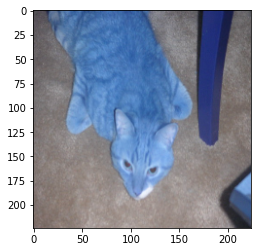

(224, 224, 3)

In [ ]:
import matplotlib.pyplot as plt
image = cv2.imread("/content/drive/My Drive/pyTorch/train/cat/10002817_5944408634.jpg")
#image.save()
image = cv2.resize(image, (224, 224))
plt.imshow(image)
plt.show()

image.shape

In [ ]:
# image_path ="/content/drive/My Drive/pyTorch/train/cat/129880739_47ef4d064c.jpg"
# image = cv2.imread(image_path)
# image = cv2.resize(image, (224, 224))
# cv2.imwrite("/content/drive/My Drive/data/train/cat/image%04i.jpg" %i,image)
# cv2.imread("/content/drive/My Drive/data/train/cat/image%04i.jpg" %i).shape
def resize_image():
  i=0
  for fruit_dir_path in glob.glob("/content/drive/My Drive/pyTorch/val/cat/"):
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
      print(image_path)
      image = cv2.imread(image_path)
      plt.imshow(image)
      image = cv2.resize(image, (224, 224))
      cv2.imwrite("/content/drive/My Drive/data/val/cat/image%04i.jpg" %i,image)
      i += 1
    cv2.destroyAllWindows()


In [ ]:
import cv2
import random,os,glob
import numpy as np
from PIL import Image 
trash_images = []
i=0


# for fruit_dir_path in glob.glob("/content/drive/My Drive/pyTorch/val/*"):
#   #for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
#   for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
#     # print(image_path)
#     # image = cv2.imread(image_path)
#     # print(image.shape)
    
#     try:
#       img = Image.open(image_path)
#       img.verify()
#     except (IOError, SyntaxError) as e:
#       print('Bad file:', image_path)
#       # !rm "{image_path}"
# resize_image()

# PyTorch code for image classification

In [ ]:
import torchvision
from torchvision import transforms
from torch.utils import data
import torch 
import torch.nn.functional as F

train_data_path = "/content/drive/My Drive/pyTorch/train"
transforms = transforms.Compose([
                                  transforms.Resize((64,64)),
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=[0.485,0.456,0.405],
                                                       std=[0.229,0.224,0.225])   
])
train_data = torchvision.datasets.ImageFolder(root=train_data_path, transform=transforms)





In [ ]:
train_data.classes

['cat', 'fish']

In [ ]:
val_data_path = "/content/drive/My Drive/pyTorch/val"
val_data = torchvision.datasets.ImageFolder(root=val_data_path, transform=transforms)

test_data_path = "/content/drive/My Drive/pyTorch/test"
test_data = torchvision.datasets.ImageFolder(root=test_data_path, transform=transforms)

In [ ]:
batch_size = 64
train_data_loader = data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_data_loader = data.DataLoader(val_data, batch_size=batch_size)
test_data_loader = data.DataLoader(test_data, batch_size=batch_size)
train_data_loader.batch_size

64

In [ ]:
# for batch_images in train_data_loader:
#   inputs, target = batch_images
#   print(inputs.shape)


In [ ]:
from torch import nn

class SimpleNet(nn.Module):

  def __init__(self):
    super(SimpleNet,self).__init__()
    self.fc1 = nn.Linear(12288, 84)
    self.fc2 = nn.Linear(84, 50)
    self.fc3 = nn.Linear(50,2)

  def forward(self,x):
    x = x.view(-1,12288)
    print(x.shape)
    x = F.relu(self.fc1(x))
    print(x.shape)
    x = F.relu(self.fc2(x))
    print(x.shape)
    #x = F.softmax(self.fc3(x),dim=1)
    x = self.fc3(x) # because we use CrossEntropyLoss it includes softmax
    #x = x.view(-1,64)
    print(x.shape)
    return x

simplenet = SimpleNet()

In [ ]:
import torch.optim as optim
optimizer = optim.Adam(simplenet.parameters(), lr=0.001)

In [ ]:
if torch.cuda.is_available:
  device = torch.device("cuda")
else:
  device = torch.device("cpu")
simplenet.to(device)

SimpleNet(
  (fc1): Linear(in_features=12288, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

In [ ]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
  for epoch in range(epochs):
    training_loss = 0.0
    valid_loss = 0.0
    model.train()
    train_correct = 0
    train_examples = 0
    for batch in train_loader:
      #print(batch)
      optimizer.zero_grad()
      inputs, targets = batch
      inputs = inputs.to(device)
      targets = targets.to(device)
      #print(inputs.shape)
      #print(targets.shape)
      output = model(inputs)
      loss = loss_fn(output, targets)
      loss.backward()
      optimizer.step()
      training_loss += loss.data.item()
      t_cor = torch.eq(torch.max(F.softmax(output), dim=1)[1], targets).view(-1)

      train_correct += torch.sum(t_cor).item()
      train_examples += t_cor.shape[0]
    training_loss /= len(train_loader.dataset)

    #print("Epoch: {}, Training Loss: {:.2f}".format(epoch, training_loss))

    model.eval()
    val_correct = 0
    val_examples = 0
    for batch in val_loader:
      inputs, target = batch
      inputs = inputs.to(device)
      target = target.to(device)
      output = model(inputs)
      loss = loss_fn(output, target)
      valid_loss += loss.data.item()
      correct = torch.eq(torch.max(F.softmax(output), dim=1)[1], target).view(-1)

      val_correct += torch.sum(correct).item()
      val_examples += correct.shape[0]
    valid_loss /= len(val_loader.dataset)

    print("Epoch: {}, Training Loss: {:.4f}, _accuracy = {:.2f}, Validation Loss: {:.4f}, val_accuracy = {:.2f}".format(epoch,
                          training_loss, train_correct/train_examples, valid_loss, val_correct/val_examples))
    # print("Epoch: {}, Training Loss: {:.2f}".format(epoch, training_loss))
    


In [ ]:
train(simplenet, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader,val_data_loader, 20, device)

torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([39, 12288])
torch.Size([39, 84])
torch.Siz

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


torch.Size([48, 12288])
torch.Size([48, 84])
torch.Size([48, 50])
torch.Size([48, 2])
Epoch: 0, Training Loss: 0.0105, _accuracy = 0.70, Validation Loss: 0.0096, val_accuracy = 0.71
torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([64, 12288])
torch.Size([64, 84])
torch.Size([64, 50])
torch.Size([64, 2])
torch.Size([64, 12288])
torch.Size([64, 84])

In [ ]:
labels = ['cat', 'fish']

img = Image.open("/content/drive/My Drive/pyTorch/test/fish/2264748919_f71767086e.jpg")
img = transforms(img).to(device)

prediction = F.softmax(simplenet(img))
prediction = prediction.argmax()
print(labels[prediction])


NameError: ignored

In [ ]:
torch.save(simplenet, "/content/drive/My Drive/pyTorch/simplenet")


In [ ]:
torch.save(simplenet.state_dict(), "/content/drive/My Drive/pyTorch/simplenet")